In [6]:
import torch
import BaselineModels as psnn
import matplotlib.pyplot as plt
import math
import os
torch.pi = math.pi 

seed = 0

In [7]:
beta = torch.tensor(0.9)
threshold = torch.tensor(1.)

In [11]:
X_train = torch.ones([1,1,64])

In [12]:
sn = psnn.SpikingNeuron(beta, threshold, random_state=True)
spikes, memories = sn(X_train[:,0,:]/5.)

AttributeError: 'SpikingNeuron' object has no attribute 'DEVICE'

In [ ]:
n = 0
plt.figure(figsize=(30,5))
plt.plot(X_train[n,0,:]/5, label='input')
plt.plot(spikes[n,:].detach().numpy(), label='spike')
plt.plot(memories[n,:].detach().numpy(), label='memory')
plt.legend()

In [ ]:
sl = psnn.SpikingLayer(N_channel, beta, threshold, random_state=True, spike_only=False)
sl

In [ ]:
spikes, memories = sl(X_train/5.)

In [ ]:
n = 0
c = 0
plt.figure(figsize=(30,5))
plt.plot(X_train[n,c,:]/10, label='input')
plt.plot(spikes[n,c,:].detach().numpy(), label='spike')
plt.plot(memories[n,c,:].detach().numpy(), label='memory')
plt.legend()

In [ ]:
tmac = psnn.TemporalWeightedSum(N_channel, N_class)
tmac

In [10]:
mactmac = tmac(spikes)
mactmac.shape

torch.Size([600, 2, 100])

In [11]:
torch.manual_seed(seed)
topology = [N_channel, 3, N_class]
snn = psnn.SpikingNeuralNetwork(topology, beta, threshold)
optimizer = torch.optim.Adam(snn.parameters(), lr=0.01)


Reset output of layer 1.


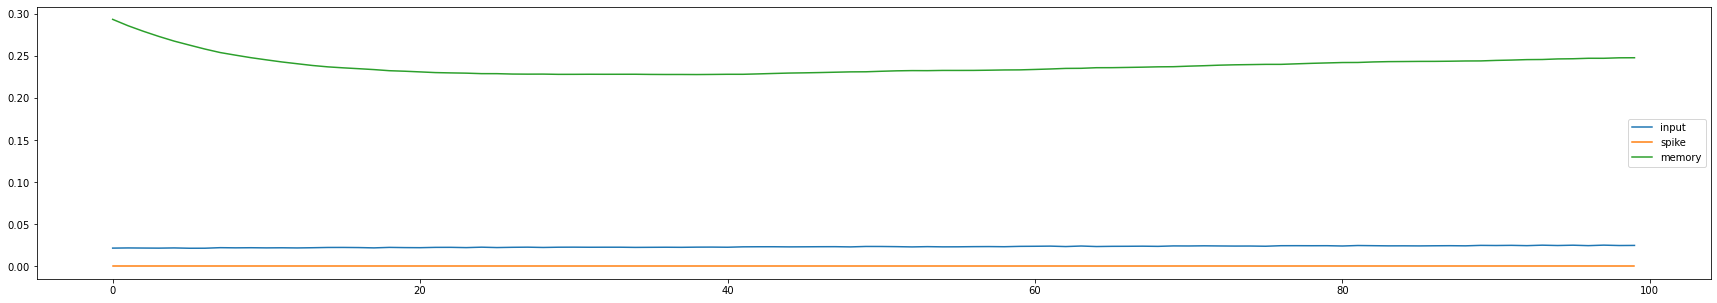

In [12]:
snn.ResetOutput(False, 1)
input = snn.model[0](X_train)
spikes,memories = snn.model[1](input)
n = 0
c = 0
plt.figure(figsize=(30,5))
plt.plot(input[n,c,:].detach().numpy(), label='input')
plt.plot(spikes[n,c,:].detach().numpy(), label='spike')
plt.plot(memories[n,c,:].detach().numpy(), label='memory')
plt.legend()

In [19]:
torch.manual_seed(seed)
topology = [N_channel, 3, N_class]
snn = psnn.SpikingNeuralNetwork(topology, beta=torch.zeros(1), threshold=torch.ones(1))
optimizer = torch.optim.Adam(snn.parameters(), lr=0.1)
loss_fn = psnn.SNNLoss()

In [20]:
for epoch in range(1000):
    y_pred_train = snn(X_train)
    loss_train = loss_fn(y_pred_train, y_train)
    acc_train = (y_pred_train.sum(2).argmax(dim=1) == y_train).float().mean()
    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()
    print(f'epoch: {epoch:-8d} | train loss: {loss_train:.5e} | train acc: {acc_train:.4f}')


epoch:        0 | train loss: 6.93147e-01 | train acc: 0.5000
epoch:        1 | train loss: 6.93147e-01 | train acc: 0.5000
epoch:        2 | train loss: 6.93147e-01 | train acc: 0.5000
epoch:        3 | train loss: 6.93147e-01 | train acc: 0.5000
epoch:        4 | train loss: 6.93147e-01 | train acc: 0.5000
epoch:        5 | train loss: 6.93147e-01 | train acc: 0.5000
epoch:        6 | train loss: 7.28341e-01 | train acc: 0.4533
epoch:        7 | train loss: 6.93147e-01 | train acc: 0.5000
epoch:        8 | train loss: 6.93147e-01 | train acc: 0.5000
epoch:        9 | train loss: 6.93147e-01 | train acc: 0.5000
epoch:       10 | train loss: 7.48369e-01 | train acc: 0.5717
epoch:       11 | train loss: 7.05073e-01 | train acc: 0.4650
epoch:       12 | train loss: 6.93147e-01 | train acc: 0.5000
epoch:       13 | train loss: 6.78901e-01 | train acc: 0.5000
epoch:       14 | train loss: 6.71152e-01 | train acc: 0.5000
epoch:       15 | train loss: 6.67518e-01 | train acc: 0.5000
epoch:  

KeyboardInterrupt: 

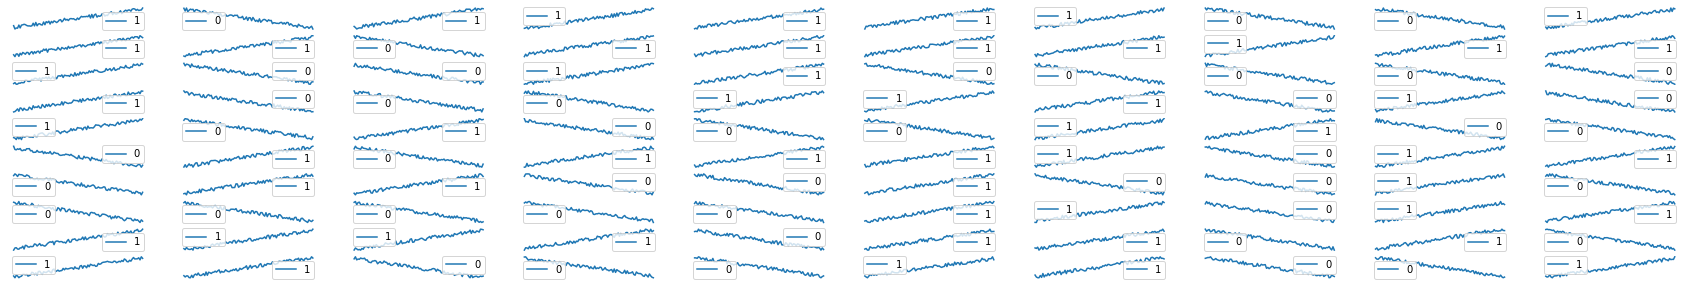

In [24]:
idx = torch.randperm(N_train)[:100]

X_visual = X_train[idx,:,:]
y_visual = y_train[idx]

plt.figure(figsize=(30,5))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.plot(X_visual[i,0,:].detach().numpy(), label=f'{y_visual[i]}')
    plt.axis('off')
    plt.legend()

tensor(0.2545)